In [176]:
using Plots
using Statistics

gr(legend=false)
default(show=true)

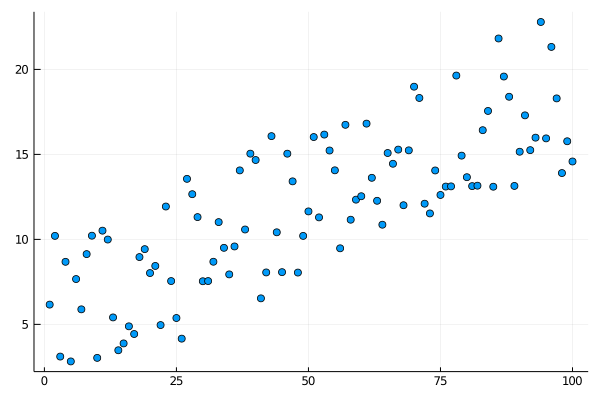

In [177]:
w = rand()
b = rand()

x = 1:100
y = (x .* w .+ b) .+ rand(100) * 10


W = rand()
B = rand()
epoch = 200
lr = 0.00001

scatter(x, y)

In [178]:
function model(x)
  return W .* x .+ B
end

function cost(pred, target)
  return mean((pred .- target).^2)
end

function d_w(x, y)
  pred = model(x)
  return mean((pred .- y) .* x)
end

function d_b(x, y)
  pred = model(x)
  return mean((pred .- y))
end

d_b (generic function with 2 methods)

W:0.20417878483564392 B:0.25610666377712676
w:0.1309557959205312 b:0.6369108350393078


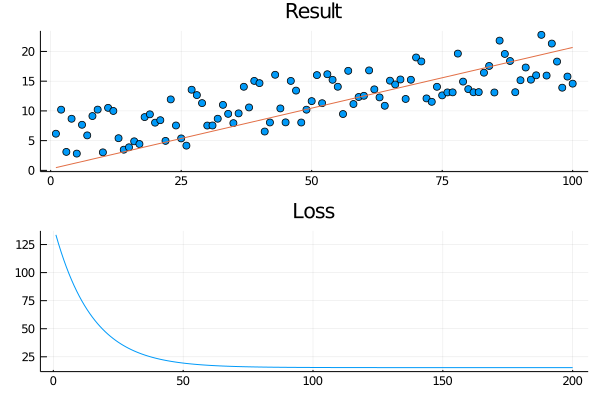

In [179]:
losses = zeros(epoch)

for i = 1:epoch
  w_tmp = W - lr * d_w(x, y)
  b_tmp = B - lr * d_b(x, y)
  W = w_tmp
  B = b_tmp
  loss = cost(model(x), y)
  losses[i] = loss
end

println("W:", W, " B:", B)
println("w:", w, " b:", b)

result_plot = scatter(x, y, title="Result")
plot!(result_plot, x, x .* W .+ B)
loss_plot = plot(1:epoch, losses, title="Loss")

plot(result_plot, loss_plot, layout=(2, 1))